# **RELATÓRIO FINAL APLICADO**

Relatório aplicado via software R com os tópicos das Unidades IV (Estimação Pontual), V (Estimação Intervalar) e VI (Teste de hipóteses sob a ótica bayesiana).

https://classroom.google.com/u/1/c/NTM2OTAwNzE2OTc5/a/NDkxMzY4NjYwOTYx/details

In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

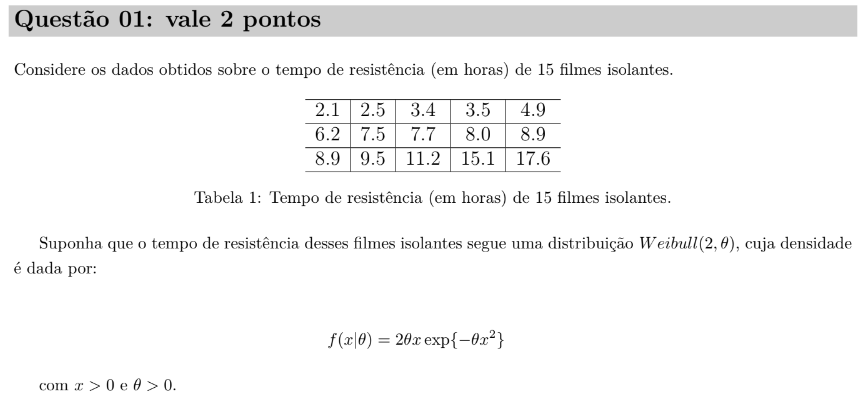

In [ ]:
dados.1 <-
  c(2.1,
  2.5,
  3.4,
  3.5,
  4.9,
  6.2,
  7.5,
  7.7,
  8.0,
  8.9,
  8.9,
  9.5,
  11.2,
  15.1,
  17.6)

In [ ]:
length(dados.1)

In [ ]:
sum(dados.1)

In [ ]:
sum(dados.1 ^ 2)

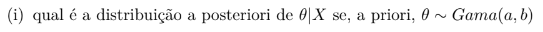

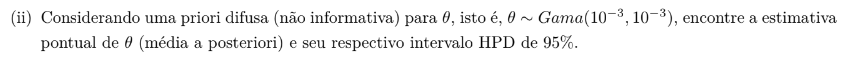

Encontrar a distribuição a posteriori computacionalmente parte por gerar um grande número de realizações
da priori, utilizando o vetor de dados observados (amostra), e calcular a média:

In [ ]:
theta <-
seq(0.00001, 0.03, 0.000001) # Vetor de 29991 elementos, diminuir tamanho caso execução lenta do laço for() a seguir
posteriori <- vector()
for (i in 1:length(theta)) {
posteriori[i] <-
prod(2 * theta[i] * dados.1 * exp(-theta[i] * dados.1 ^ 2)) * dgamma((theta[i]), shape =
1e-3,
rate = 1e-3)
}
sum(theta * posteriori / sum(posteriori)) # Média a posteriori

In [ ]:
plot(theta, posteriori, main = "Densidade da distribuição a posteriori",
xlab = expression(theta))

Portanto, a estimativa obtida computacionalmente para θ é aproximadamente 0,01262287.

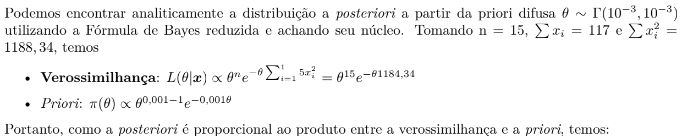

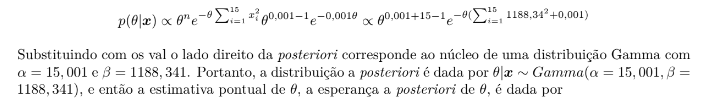

In [ ]:
# média a posteriori
15.001/1188.341

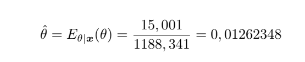

O intervalo HPD (Highest Posterior Density) (0, 006578652; 0, 019094621) para a resistência dos filmes
isolantes é obtido numericamente, utilizando o pacote TeachingDemos do R:

In [ ]:
require(TeachingDemos)
## Loading required package: TeachingDemos
hpd(qgamma, shape = 15 + 10 ^ -3, rate = 1188.34 + 10 ^ -3)
## [1] 0.006612998 0.019124927
plot(
theta,
dgamma(theta, shape = 15 + 10 ^ -3, rate = 1188.34 + 10 ^ -3),
type = 'l',
main = "Densidade a posteriori \n com Intervalo HPD de 95%",
ylab = "Distribuição a Posteriori",
xlab = expression(theta)
)
abline(v = c(0.006612998, 0.019124927), col = "blue")

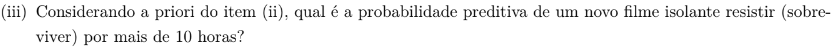

In [ ]:
mean(exp(-100 * rgamma(100000, 15 + 10 ^ -3, 1188.34 + 10 ^ -3))) # Função preditiva como média a posteriori

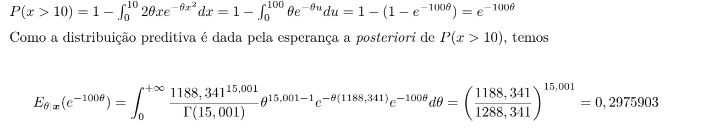

In [ ]:
(1188.341/1288.341)^{15.001}

Portanto, a probabilidade de um novo filme isolante sobreviver a mais de 10 horas é aproximadamente
0, 2975903.

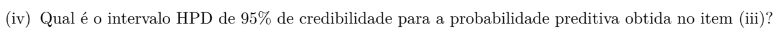

In [ ]:
emp.hpd(exp(-100*rgamma(100000, 15+10^-3, 1188.34+10^-3)))

O Intervalo HPD para a probabilidade de um novo filme isolante sobreviver a mais de 10 horas é igual a
(0, 1261946; 0, 4773694).

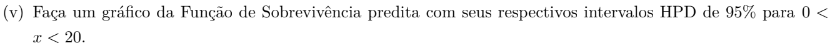

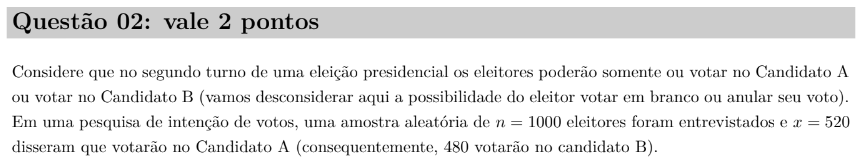

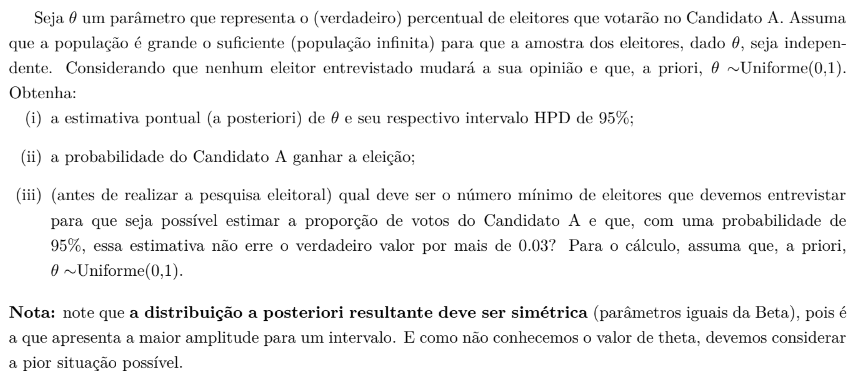

**Item (i)**

In [ ]:
theta <- seq(0, 1, 0.000001) # length(theta) = 1000001

posteriori <- vector(length = length(theta))

for (i in 1:length(theta)) {
posteriori[i] = dbinom(520, 1000, theta[i]) * 1 # Voto no Candidato A = Sucesso
}

plot(
theta,
posteriori,
main = "Distribuição a posteriori",
xlab = expression(theta),
ylab = "Posteriori"
)
sum((theta * posteriori / sum(posteriori))) # média posteriori


hpd(qbeta, shape1 = 521, shape2 = 481) # Utilizando a propriedade de conjugação beta-binomial
plot(
theta,
dbeta(theta, shape1 = 521, shape2 = 481),
type = 'l',
main = "Distribuição a posteriori \n com Intervalo HPD de 95%",
ylab = "Posteriori",
xlab = expression(theta)
)
abline(v = c(0.4890368, 0.5508611), col = "red")

In [ ]:
# Média a posteriori de theta
521/(521+481)

Portanto, a estimativa pontual para θ obtida computacionalmente é aproximadamente 0, 5199601, e o Intervalo HPD de 95% para o percentual de votos do Candidato A é de (0.4890368; 0.5508611)

**Item (ii)**

In [ ]:
1-pbeta(0.5,shape1=521,shape2=481)

O Candidato A ganha a eleição com probabilidade ≈ 0,8969463

**Item (iii)**

In [ ]:
(qnorm(.975)/.06)^2


Usando resultados de teoria assintótica, sabemos que quando n → ∞ a distribuição de ˆθ é aproximadamente
normal com média igual a θ e variância aproximadamente igual ao inverso da informação observada de Fisher.
Considerando o erro padrão como 0,03 (i.e. com amplitude igual a 0,06) como dado no comando da questão,
temos n no mínimo igual a 1068.

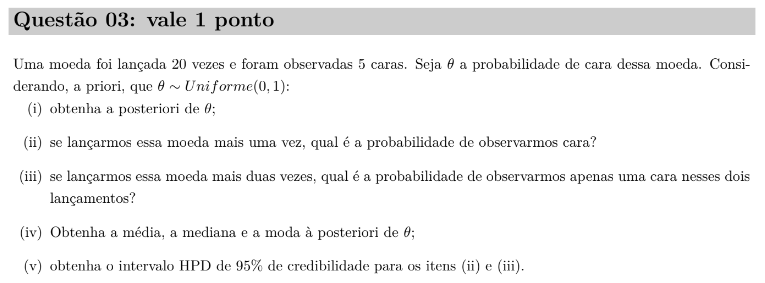